In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from src.data.create_corpus_dataset import create_dataset, DatasetConfig, UtteranceType
from datasets import load_from_disk
from collections import defaultdict


# load dataset
dataset_folder = "../../data/processed/with_context"
dataset_path = os.path.join(dataset_folder, "corpus_dataset_v2")
output_directory = "../../reports/dataset_statistics/corpus_dataset_v2/corpus_dataset"

os.makedirs(output_directory, exist_ok=True)


if not os.path.exists(dataset_path):
    # Beispiel zum Erstellen eines Datensatzes. Mögliche Optionen von DatasetConfig sind im DocString beschrieben.
    create_dataset(
        DatasetConfig(
            dataset_path=dataset_path,
            project_dir="../../",
            utterance_type=UtteranceType.User,
            eval_size=0.5,
            validation_test_ratio=0.5
        )
    )


# Beispiel zum Laden des Datensatzes + collate_function des DataLoaders um dynamisch ein Subset der negative passages zu laden.
loaded_dataset = load_from_disk(dataset_path)

In [50]:
from ethikchat_argtoolkit.Dialogue.discussion_szenario import DiscussionSzenario
from ethikchat_argtoolkit.ArgumentGraph.response_template_collection import ResponseTemplateCollection


# load argument_graphs
def load_response_template_collection(topic: str) -> ResponseTemplateCollection:
    return ResponseTemplateCollection.from_csv_files(
        templates_directory_path=f"../../data/external/argument_graphs/szenario_{topic}"
    )


argument_graph_med = load_response_template_collection("s1")
argument_graph_jur = load_response_template_collection("s2")
argument_graph_auto = load_response_template_collection("s3")
argument_graph_ref = load_response_template_collection("s4")

argument_graphs = {
    DiscussionSzenario.MEDAI: argument_graph_med,
    DiscussionSzenario.JURAI: argument_graph_jur,
    DiscussionSzenario.AUTOAI: argument_graph_auto,
    DiscussionSzenario.REFAI: argument_graph_ref
}


Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_introductions.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_transitions.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_groups.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_zargs.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_nzargs.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s1/templates_faq.csv ... Done
Loading samples from file ../../data/external/argument_graphs/szenario_s1/samples_collection.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s2/templates_introductions.csv ... Done
Loading templates from file ../../data/external/argument_graphs/szenario_s2/templates_transitions.csv ... Done
Loading templates from fil

In [51]:
labels_per_scenario = {}
for scenario, argument_graph in argument_graphs.items():
    labels_per_scenario[scenario] = argument_graph.user_intent_labels
labels_per_scenario

{<DiscussionSzenario.MEDAI: 'MEDAI'>: {'FAQ.1',
  'FAQ.2',
  'FAQ.3',
  'FAQ.4',
  'FAQ.5',
  'FAQ.6',
  'FAQ.7',
  'FAQ.8',
  'NZ.K1',
  'NZ.K10',
  'NZ.K11',
  'NZ.K3',
  'NZ.K4',
  'NZ.K6',
  'NZ.K8',
  'NZ.K9',
  'NZ.P1',
  'Z.K1',
  'Z.K1-1',
  'Z.K1-2',
  'Z.K10',
  'Z.K10-1',
  'Z.K10-2',
  'Z.K11',
  'Z.K11-1',
  'Z.K12',
  'Z.K12-1',
  'Z.K13',
  'Z.K13-1',
  'Z.K14',
  'Z.K14-1',
  'Z.K15',
  'Z.K15-1',
  'Z.K16',
  'Z.K16-1',
  'Z.K18',
  'Z.K18-1',
  'Z.K19',
  'Z.K19-1',
  'Z.K2',
  'Z.K2-4',
  'Z.K20',
  'Z.K3',
  'Z.K3-1',
  'Z.K3-1-1',
  'Z.K3-2',
  'Z.K4',
  'Z.K4-1',
  'Z.K5',
  'Z.K5-1',
  'Z.K6',
  'Z.K6-1',
  'Z.K7',
  'Z.K7-1',
  'Z.K8',
  'Z.K8-1',
  'Z.K8-2',
  'Z.K9',
  'Z.K9-1',
  'Z.P1',
  'Z.P1-1',
  'Z.P1-1-1',
  'Z.P2',
  'Z.P3',
  'Z.P3-1',
  'Z.P3-1-1',
  'Z.P3-2',
  'Z.P4',
  'Z.P4-1',
  'Z.P5',
  'Z.P5-1',
  'Z.P6',
  'Z.P6-1',
  'Z.P6-1-1',
  'Z.P7',
  'Z.P7-1'},
 <DiscussionSzenario.JURAI: 'JURAI'>: {'FAQ.1',
  'FAQ.2',
  'FAQ.3',
  'FAQ.4',
  'FAQ.5

In [52]:
passages = loaded_dataset['passages']
passages_df = passages.to_pandas()
counts = passages_df.groupby(["discussion_scenario", "label"]).size().unstack(fill_value=0)
counts

label,FAQ.1,FAQ.2,FAQ.3,FAQ.4,FAQ.5,FAQ.6,FAQ.7,FAQ.8,NZ.K1,NZ.K10,...,Z.P8,Z.P8-1,Z.P8-1-1,Z.P8-1-2,Z.P8-1-2-1,Z.P8-2,Z.P9,Z.P9-1,Z.P9-1-1,Z.P9-2
discussion_scenario,,,,,,,,,,,,,,,,,,,,,
AUTOAI,22,22,26,0,0,0,0,0,0,39,...,59,53,35,76,24,0,39,32,27,0
JURAI,29,27,28,28,29,23,0,0,22,37,...,48,27,0,0,0,32,0,0,0,0
MEDAI,27,39,39,42,25,25,41,27,23,213,...,0,0,0,0,0,0,0,0,0,0
REFAI,22,24,22,22,22,24,26,29,0,50,...,23,22,0,0,0,0,30,23,0,22


In [53]:

# Step 1: Load dataset and extract queries
queries = loaded_dataset["queries"]
print(len(queries))
queries = queries.filter(lambda entry: entry["discussion_scenario"] == "MEDAI")
print(len(queries))

queries_df = queries.to_pandas()


# Step 2: Build co-occurrence groups using union-find
class UnionFind:
    def __init__(self):
        self.parent = {}

    def find(self, x):
        if x not in self.parent:
            self.parent[x] = x
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        self.parent[self.find(x)] = self.find(y)


uf = UnionFind()

# Group labels that appear together in any query
for labels in queries_df["labels"]:
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            uf.union(labels[i], labels[j])

# Step 3: Create disjoint label groups
label_groups = defaultdict(set)
for label in set(label for labels in queries_df["labels"] for label in labels):
    group_id = uf.find(label)
    label_groups[group_id].add(label)

# Step 4: Count queries for each group
group_query_counts = defaultdict(int)
for labels in queries_df["labels"]:
    if labels is not None:
        group_id = uf.find(labels[0])
        group_query_counts[frozenset(label_groups[group_id])] += 1

# Output the result
for label_group, count in group_query_counts.items():
    print(f"{sorted(label_group)}: {count}")


2772
1437
['FAQ.1', 'FAQ.2', 'FAQ.7', 'NZ.K10', 'Z.K1', 'Z.K1-1', 'Z.K10', 'Z.K10-2', 'Z.K12', 'Z.K13', 'Z.K14', 'Z.K15', 'Z.K15-1', 'Z.K16', 'Z.K18', 'Z.K19', 'Z.K2', 'Z.K3', 'Z.K4', 'Z.K6', 'Z.K7', 'Z.K7-1', 'Z.K8', 'Z.K9', 'Z.P1', 'Z.P1-1-1', 'Z.P2', 'Z.P3', 'Z.P3-1', 'Z.P4', 'Z.P4-1', 'Z.P5', 'Z.P6', 'Z.P7-1']: 1229
['Z.P1-1']: 28
['NZ.K4']: 2
['NZ.K9']: 16
['Z.K5']: 4
['Z.K5-1']: 9
['Z.K2-4', 'Z.K3-1']: 11
['Z.K14-1']: 6
['FAQ.3']: 17
['Z.K4-1']: 10
['Z.K18-1']: 7
['Z.P5-1']: 6
['FAQ.6']: 3
['FAQ.5']: 2
['Z.K16-1']: 3
['FAQ.8']: 5
['NZ.K3']: 7
['NZ.K8']: 10
['NZ.K6']: 6
['Z.P3-1-1']: 6
['Z.P7']: 4
['Z.P6-1-1']: 1
['Z.K8-1']: 6
['Z.K11']: 8
['NZ.K1']: 1
['Z.K10-1']: 1
['Z.K3-1-1']: 1
['Z.K9-1']: 1
['Z.K20']: 2
['NZ.K11']: 7
['Z.K8-2']: 1
['Z.P3-2']: 6
['Z.P6-1']: 3
['Z.K13-1']: 2
['NZ.P1']: 3
['Z.K6-1']: 1
['Z.K1-2']: 1
['Z.K12-1']: 1


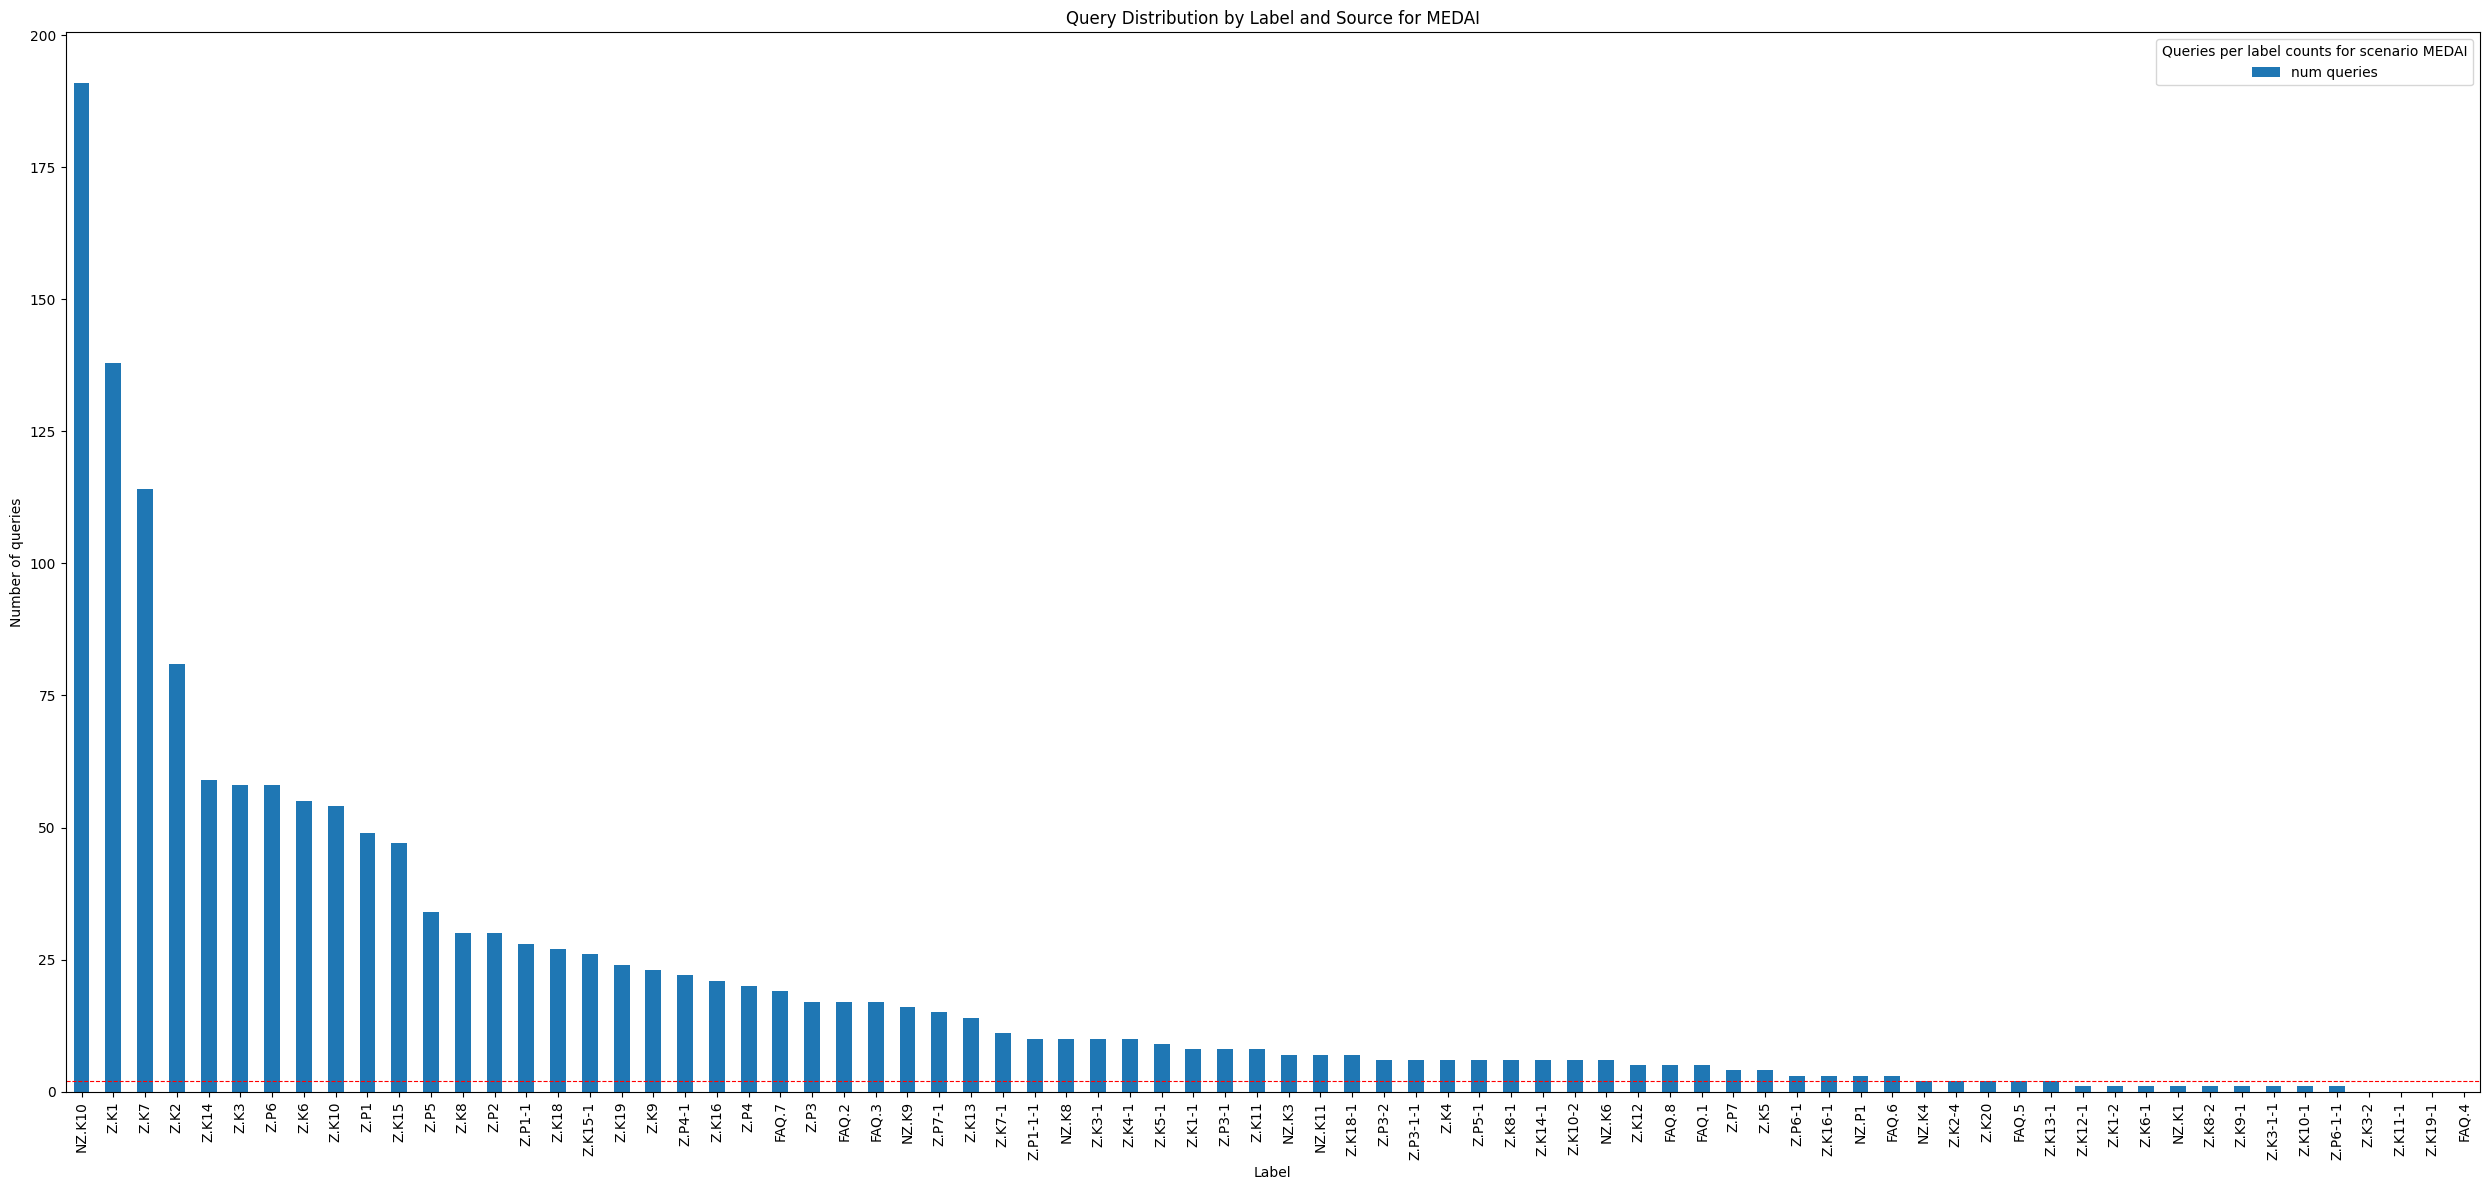

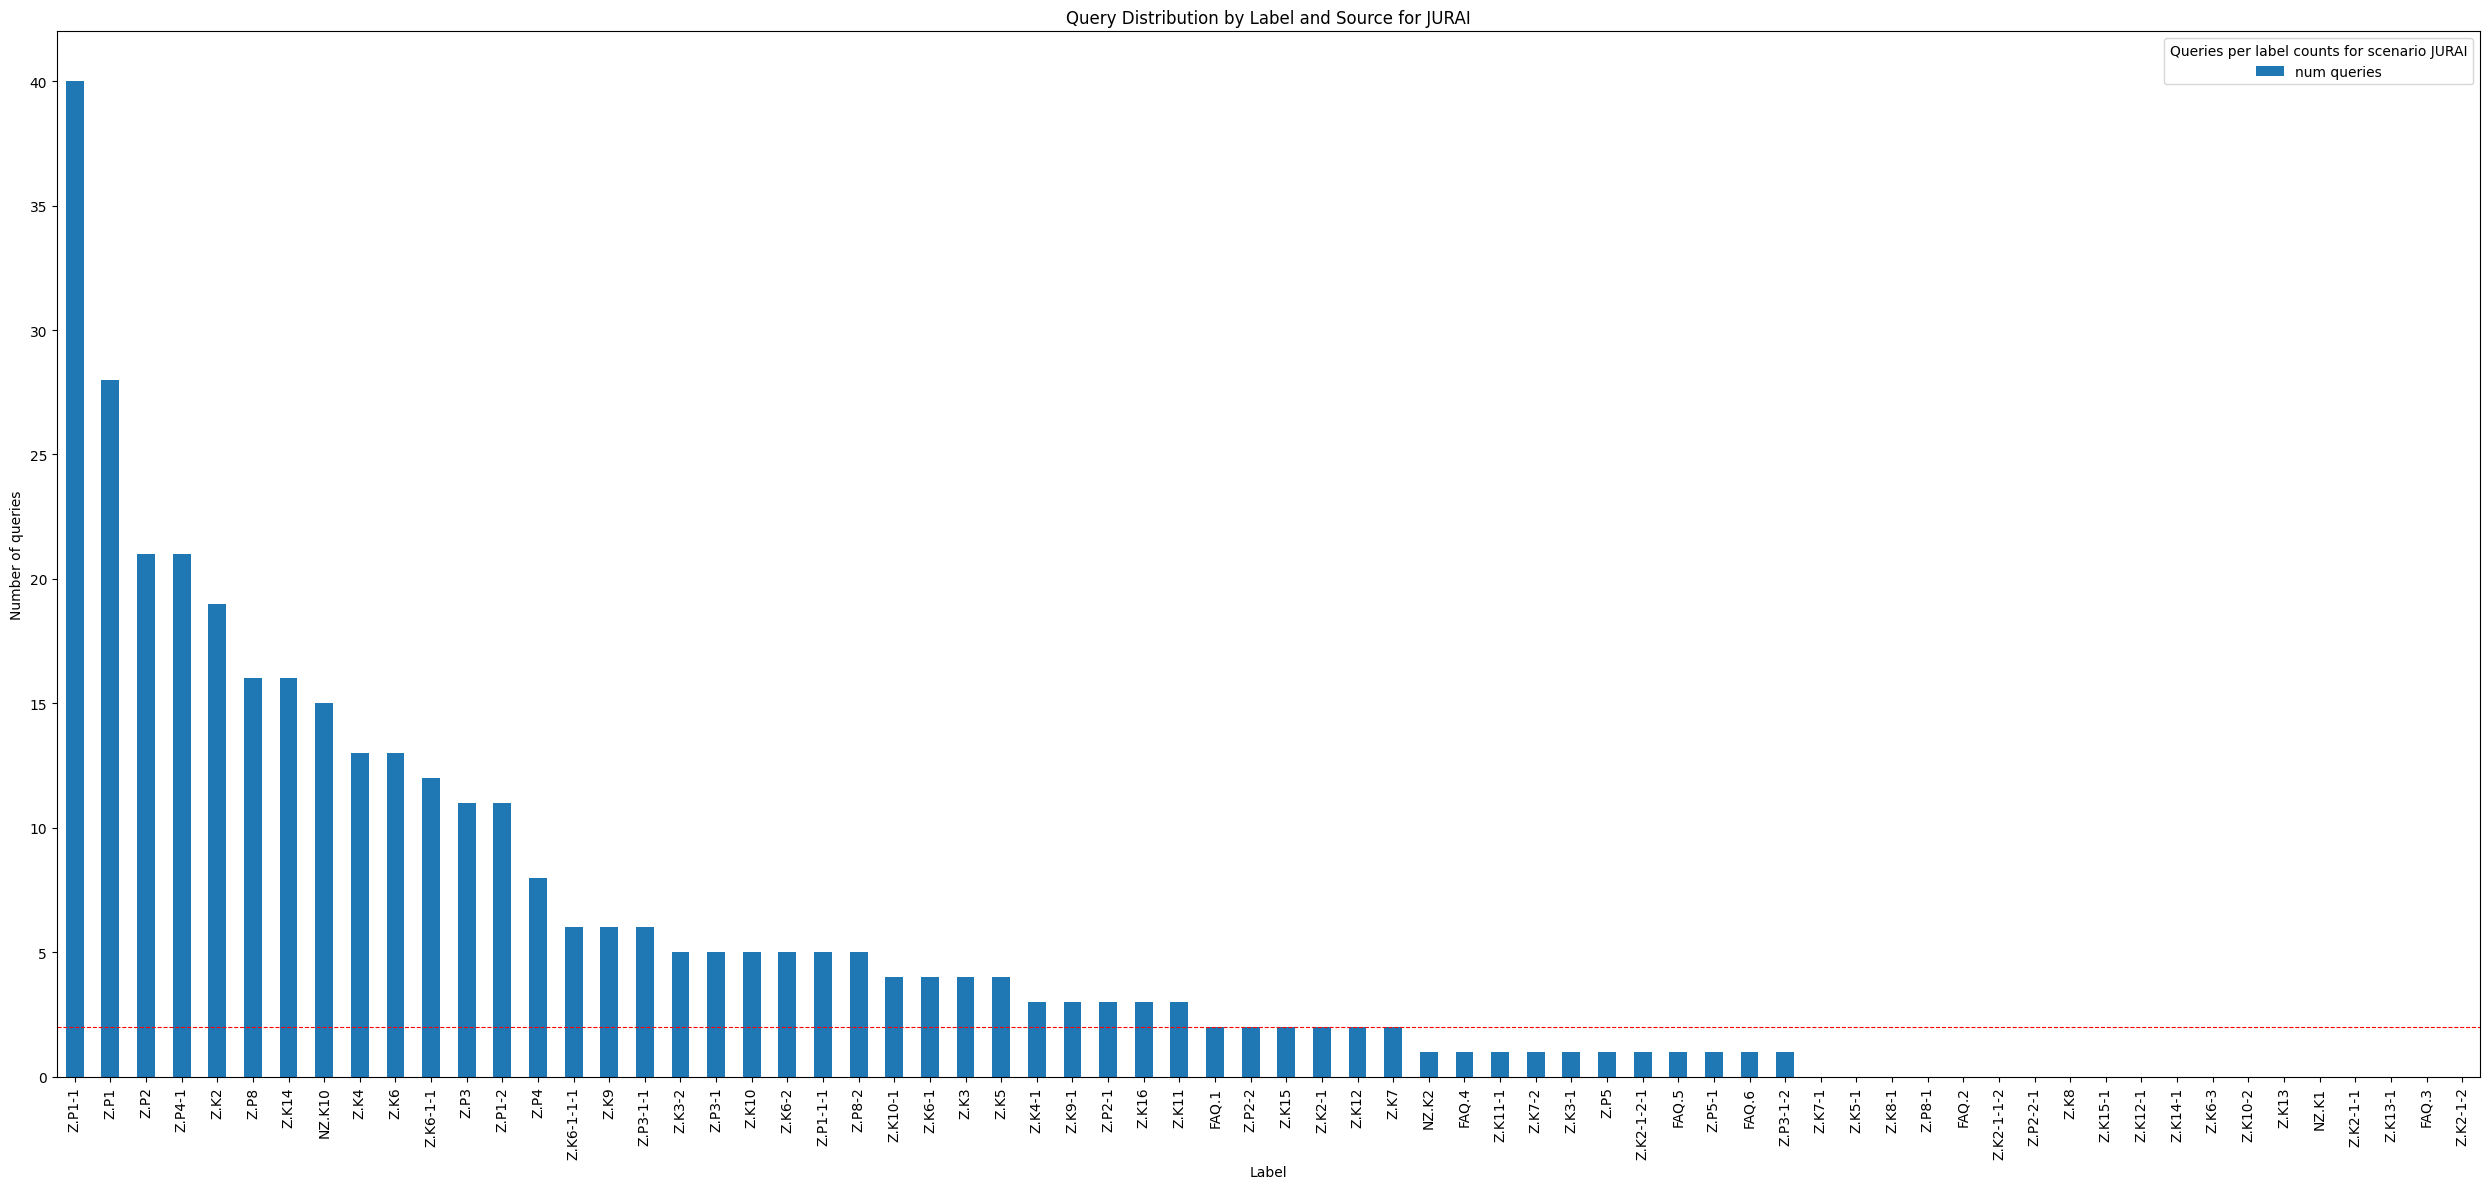

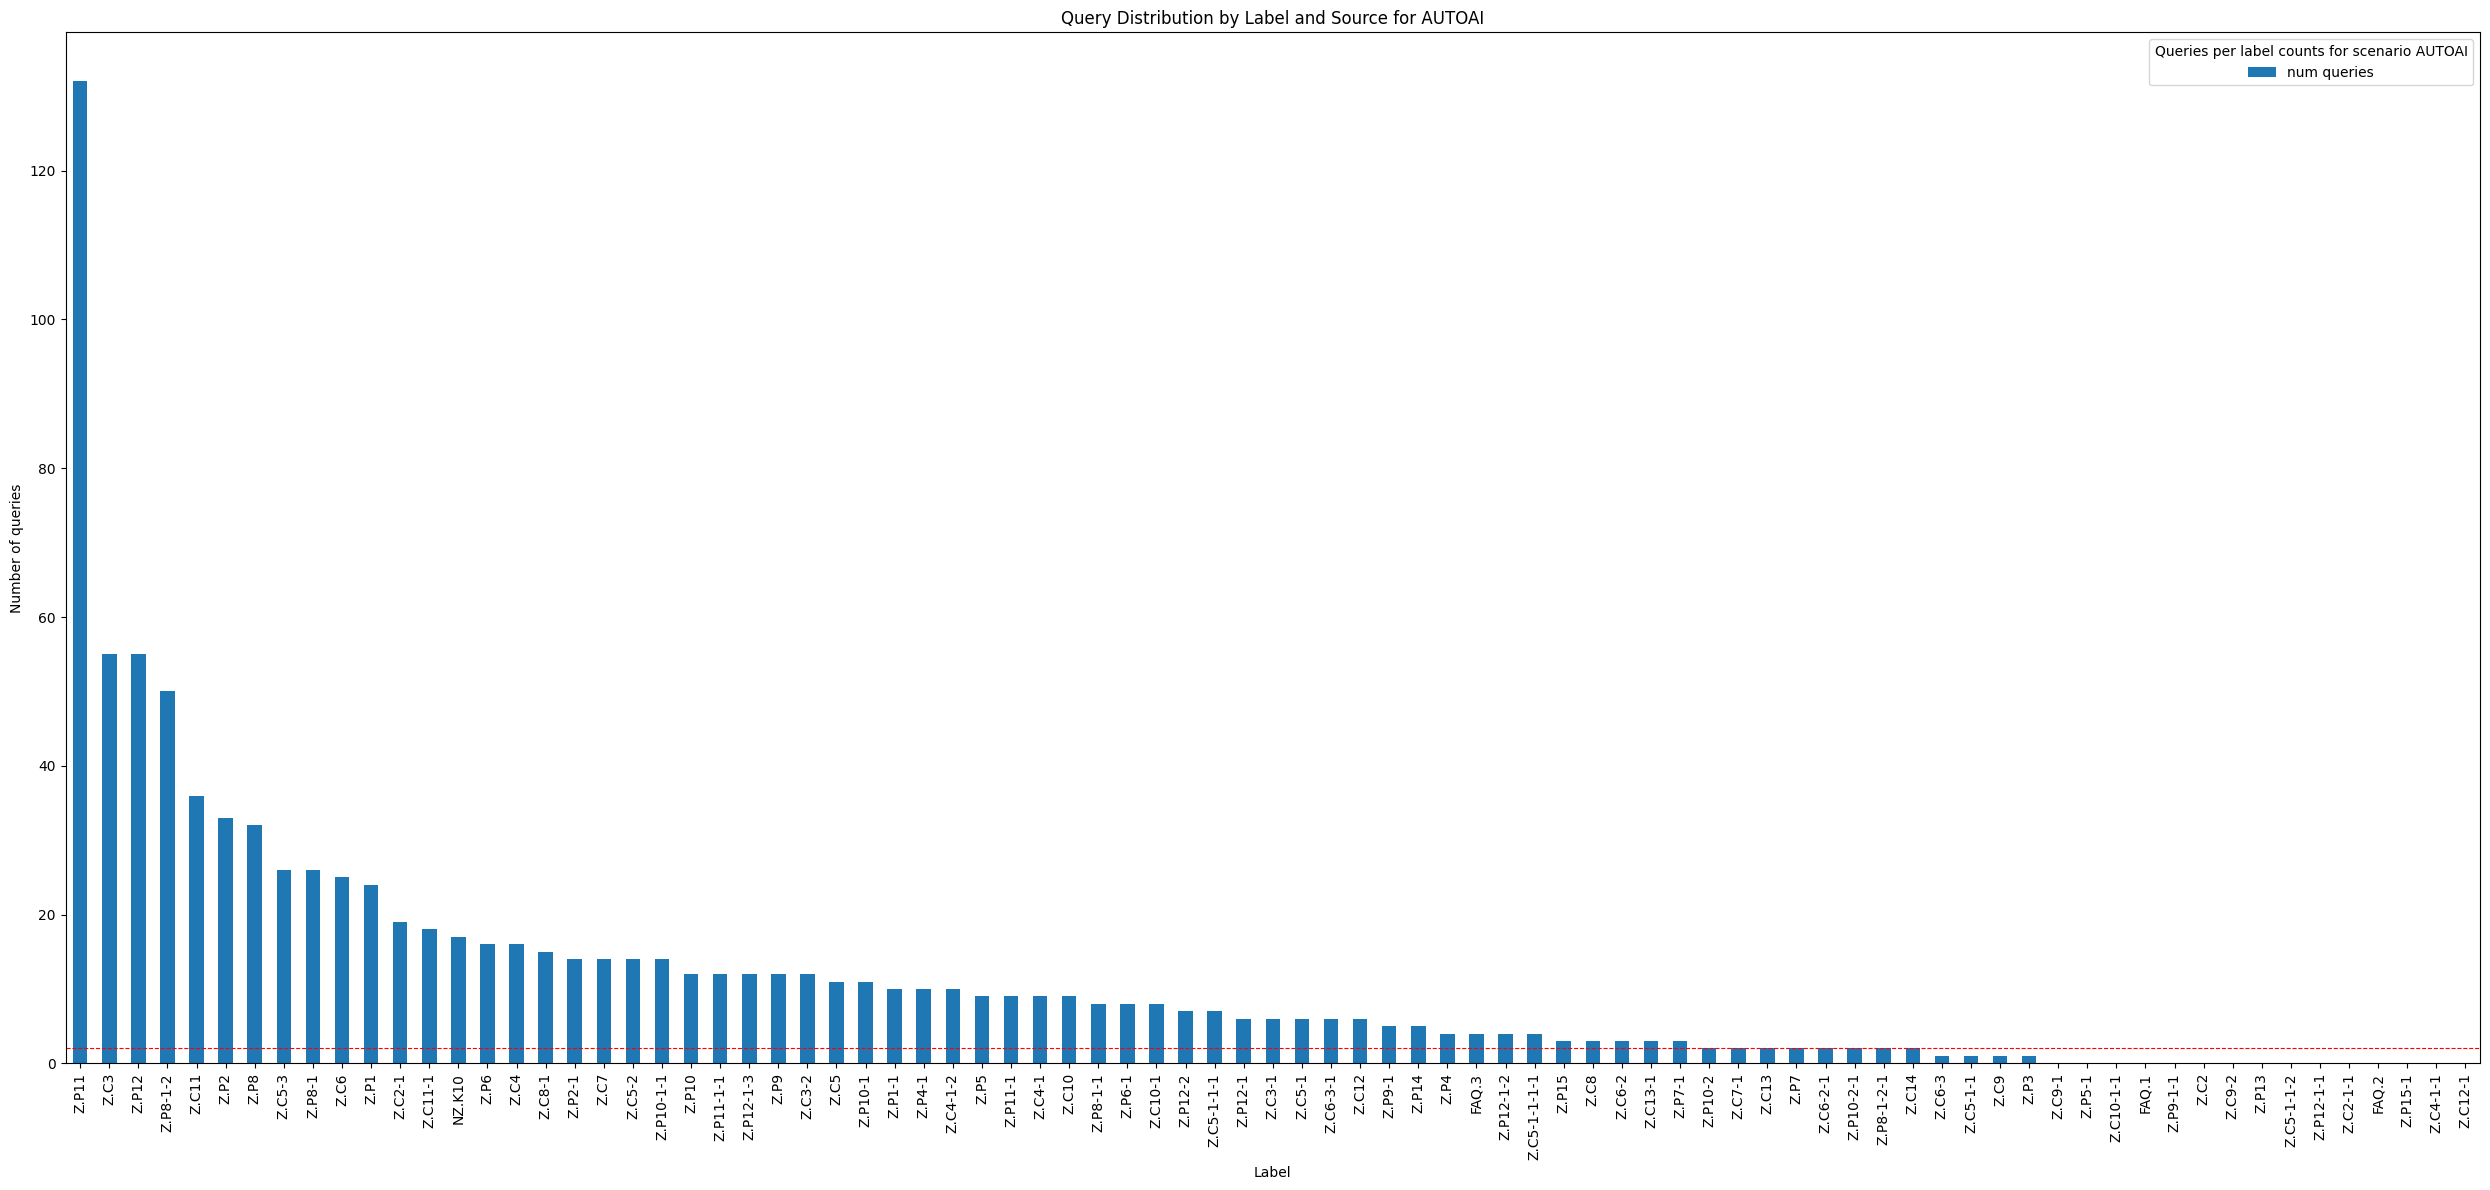

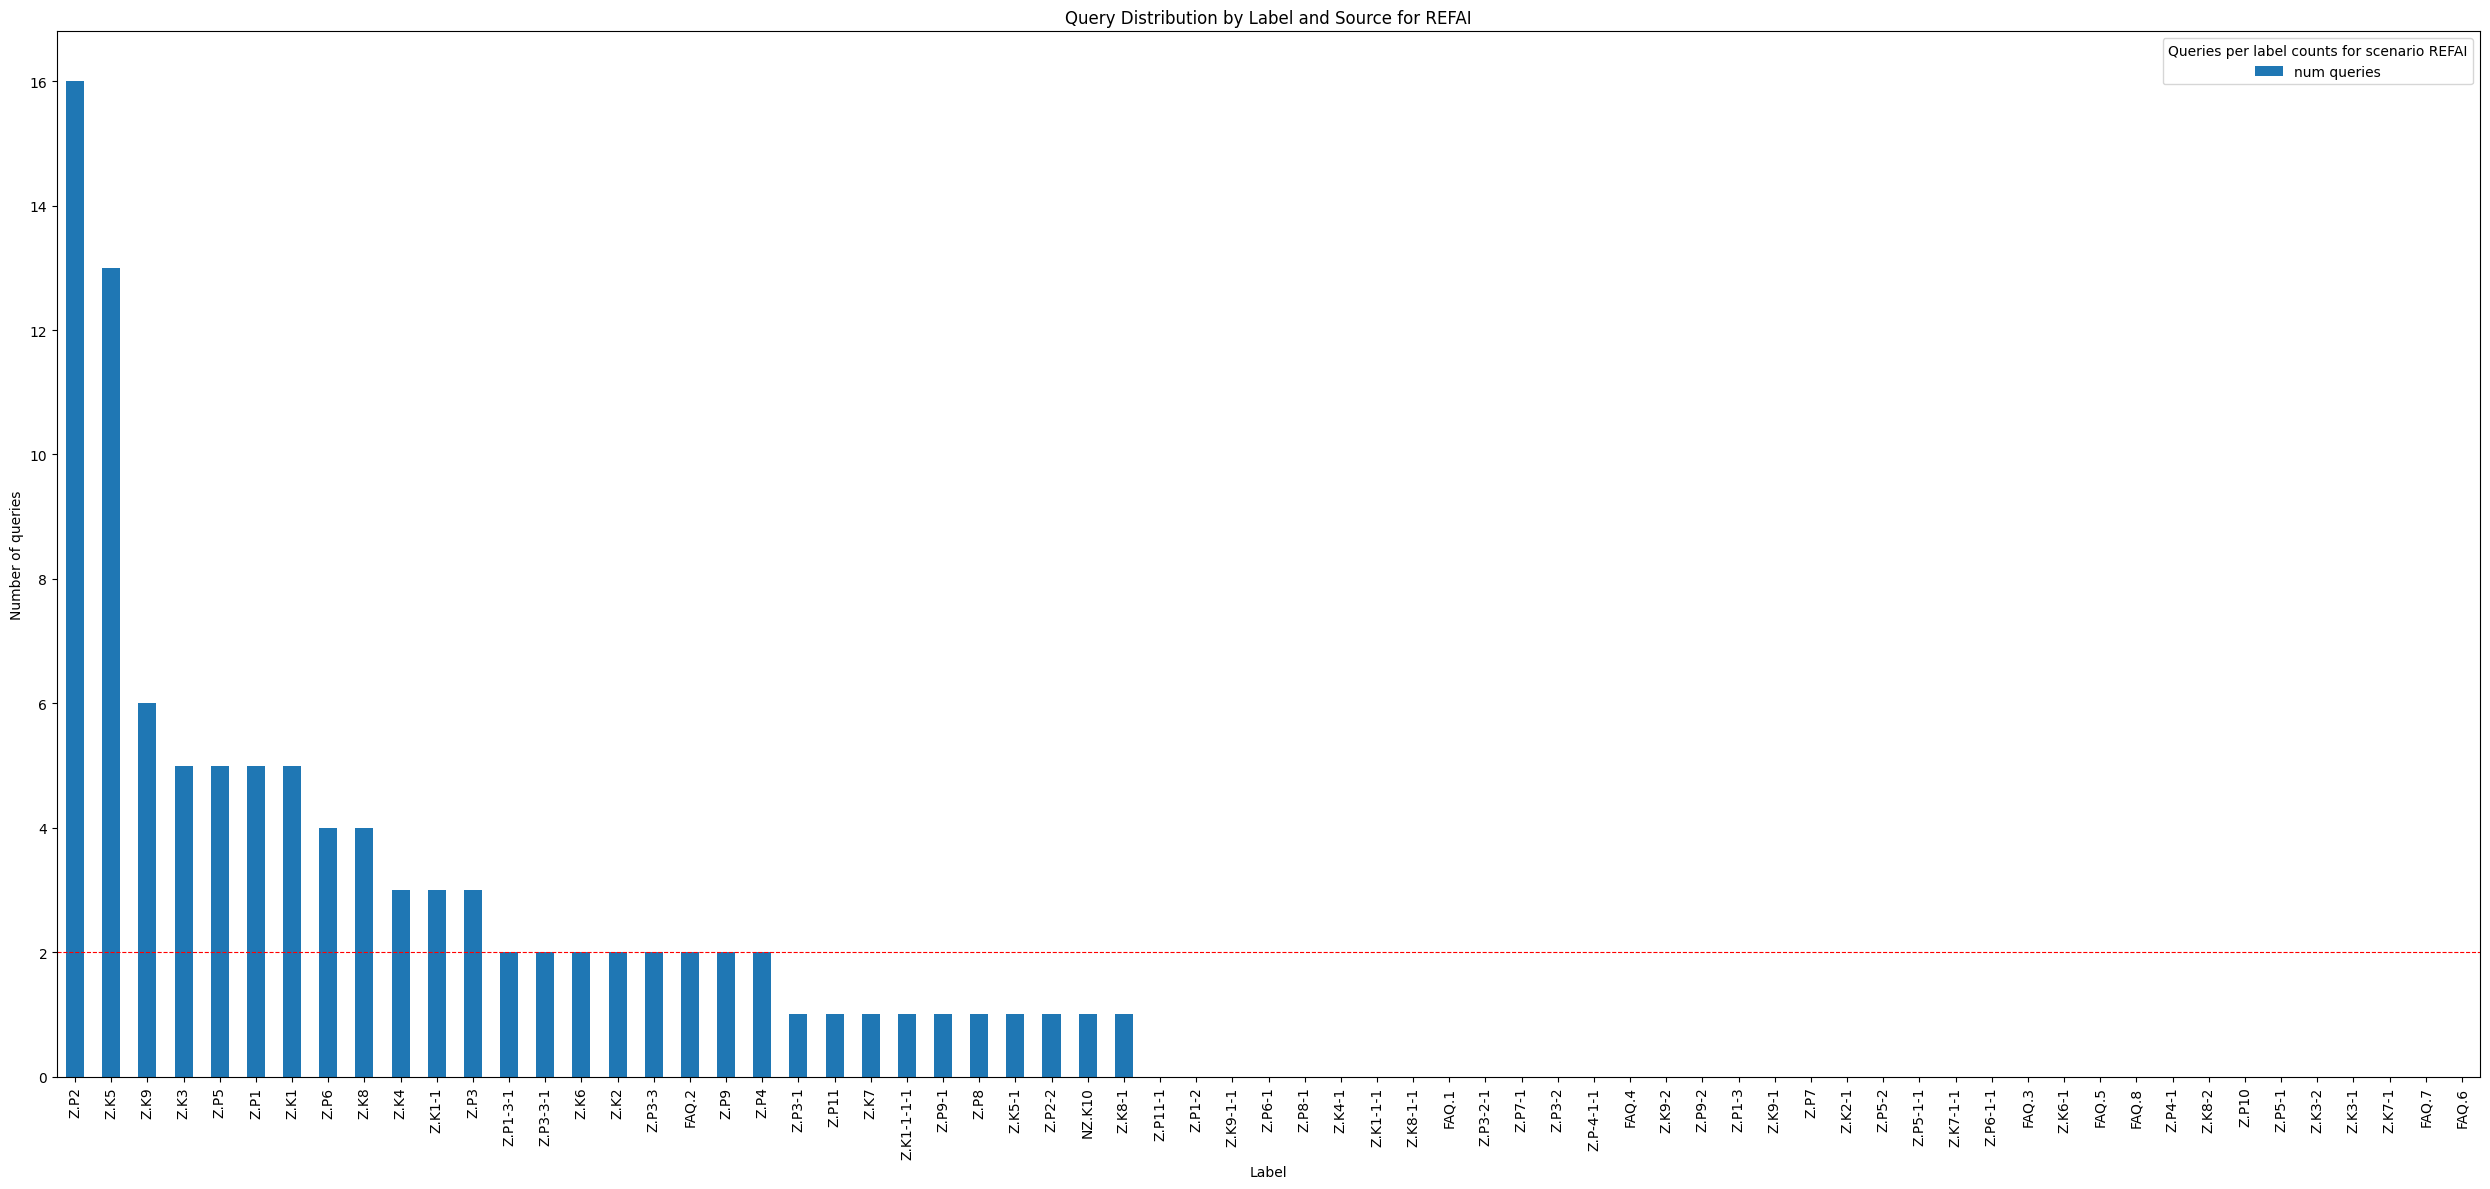

In [57]:
queries = loaded_dataset["queries"]
queries_df = queries.to_pandas()

label_query_counts = defaultdict(lambda: defaultdict(int))
for idx, row in queries_df.iterrows():
    labels = row["labels"]
    scenario = row["discussion_scenario"]
    for label in labels:
        if label in labels_per_scenario[scenario]:
            label_query_counts[scenario][label] += 1

for scenario, labels in labels_per_scenario.items():
    for label in labels:
        if label not in label_query_counts[scenario].keys():
            label_query_counts[scenario][label] = 0

horizontal_bars = [2]


for scenario, counts in label_query_counts.items():
    queries_counts_df = pd.DataFrame(counts.items(), columns=["label", "num queries"])
    queries_counts_df.sort_values("num queries", ascending=False, inplace=True)
    queries_counts_df.to_csv(f"queries_counts_per_label_corpus_dataset_{scenario}.csv")
    ax = queries_counts_df.plot(kind="bar", stacked=True, figsize=(25, 12), x="label")

    # Insert horizontal bars
    for bar_height in horizontal_bars:
        ax.axhline(y=bar_height, color='red', linestyle='--', linewidth=0.8)

    plt.xlabel("Label")
    plt.ylabel("Number of queries")
    plt.title(f"Query Distribution by Label and Source for {scenario}")
    plt.xticks(rotation=90)
    plt.legend(title=f"Queries per label counts for scenario {scenario}")
    plt.tight_layout()
    plt.show()
print("\n\n")



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


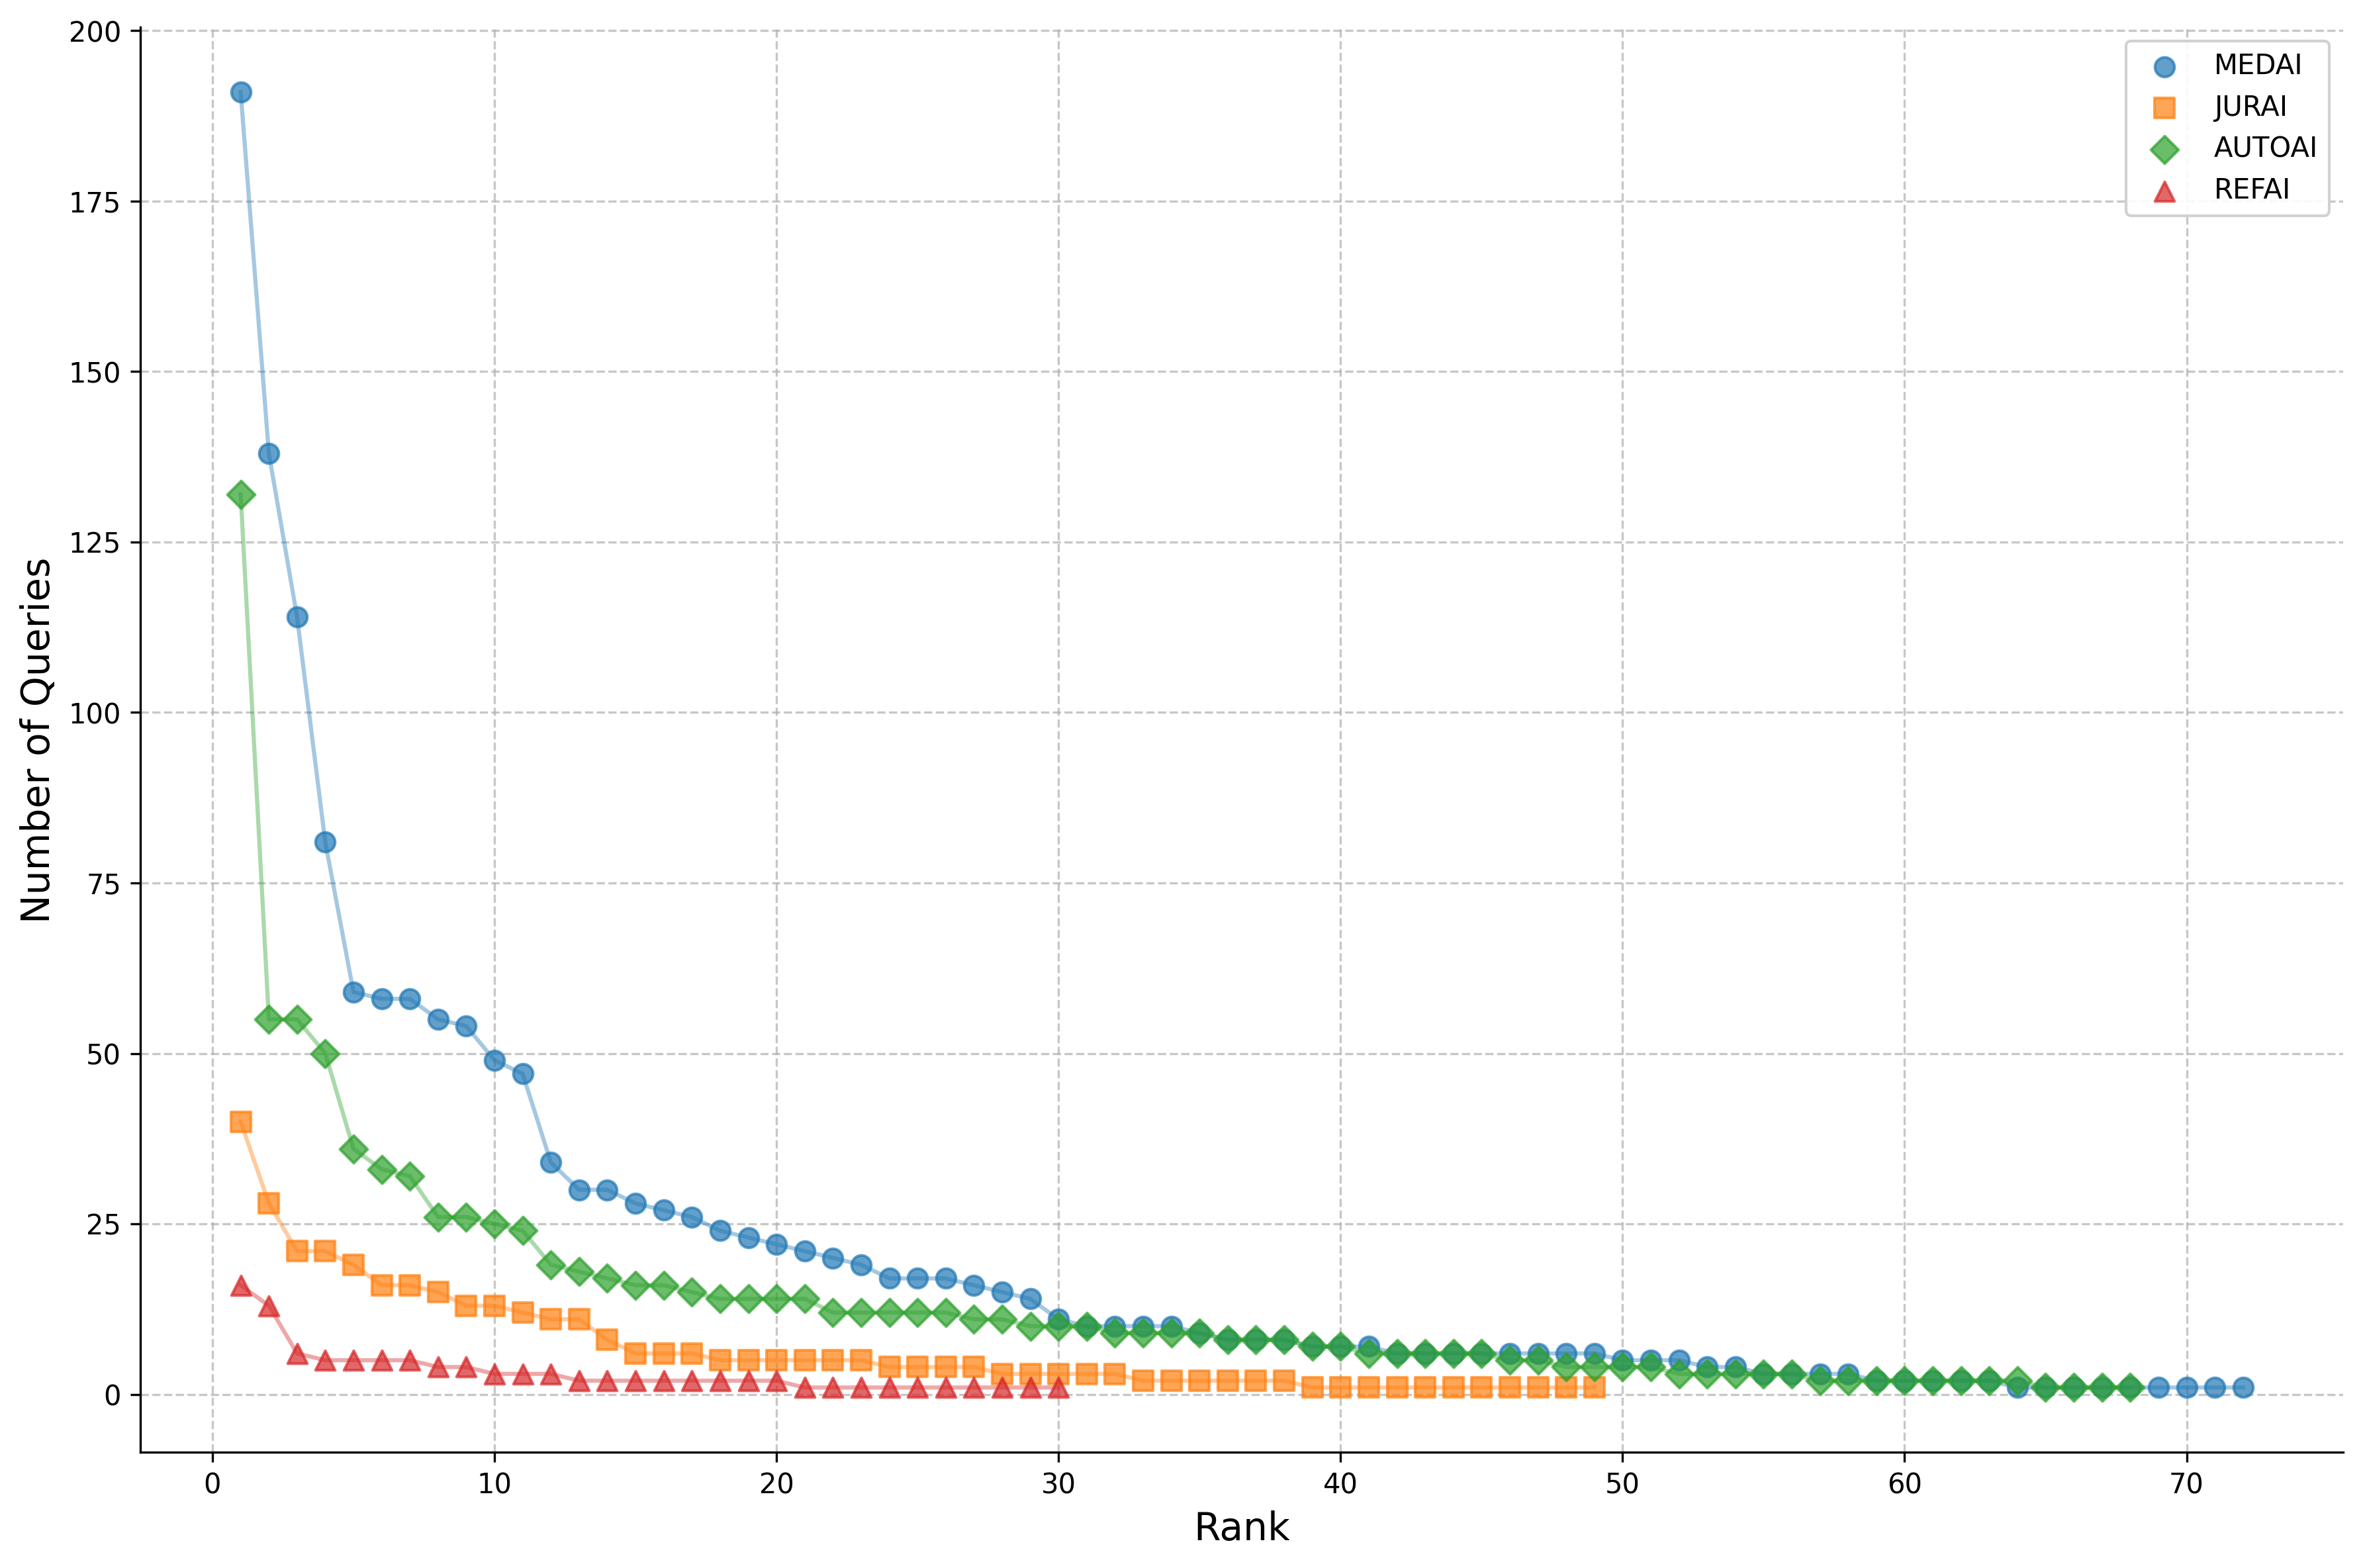

In [63]:
from src.statistics.helper_functions import create_combined_rank_frequency_plot

# Create a linear scale rank-frequency plot
fig, ax = create_combined_rank_frequency_plot(
    label_query_counts,
    figsize=(12, 8),
    ylabel='Number of Queries'
)

# For better visualization of the long tail
# ax.set_xlim(0, 50)  # Focus on first 50 ranks
plt.savefig(f'{output_directory}/rank_frequency_linear.eps', format="eps")

In [42]:
from datasets import DatasetDict


# count label types and amount of queries
# z args: main and counter
# nz args: main
# faq questions
# number of noisy queries
def get_label_type_counts_for_scenario(lq_counts, noisy_queries: DatasetDict):
    scenario_type_counts = defaultdict(lambda: defaultdict(int))
    for scenario, label_counts in lq_counts.items():
        ag = argument_graphs[scenario]
        z_main_labels = [template.label for template in ag.first_level_z_templates]
        z_counter_labels = [label for label in ag.z_arguments_labels if label not in z_main_labels]
        nz_labels = [template.label for template in ag.nz_arguments_first_level_templates]
        faq_question_labels = ag.faq_question_labels
        label_to_type = {label: "main" for label in z_main_labels}
        label_to_type.update({label: "counter" for label in z_counter_labels})
        label_to_type.update({label: "unfounded" for label in nz_labels})
        label_to_type.update({label: "faq" for label in faq_question_labels})

        for label, count in label_counts.items():
            scenario_type_counts[scenario][label_to_type[label]] += count

        print(noisy_queries.filter(lambda entry: entry["discussion_scenario"] == scenario))
        nq = noisy_queries.filter(lambda entry: entry["discussion_scenario"] == scenario).num_rows
        scenario_type_counts[scenario]["other"] = nq
    return scenario_type_counts


# get_label_type_counts_for_scenario(label_query_counts, )
df = pd.DataFrame(get_label_type_counts_for_scenario(label_query_counts, loaded_dataset["noisy_queries"]))
df.loc['Total'] = df.sum()
display(df)
df.to_csv("num_label_types_per_scenario.csv")


Dataset({
    features: ['id', 'text', 'labels', 'discussion_scenario', 'context', 'scenario_description', 'scenario_question', 'reason'],
    num_rows: 515
})
Dataset({
    features: ['id', 'text', 'labels', 'discussion_scenario', 'context', 'scenario_description', 'scenario_question', 'reason'],
    num_rows: 89
})
Dataset({
    features: ['id', 'text', 'labels', 'discussion_scenario', 'context', 'scenario_description', 'scenario_question', 'reason'],
    num_rows: 284
})
Dataset({
    features: ['id', 'text', 'labels', 'discussion_scenario', 'context', 'scenario_description', 'scenario_question', 'reason'],
    num_rows: 34
})


,MEDAI,JURAI,AUTOAI,REFAI
main,946,164,428,70
counter,254,161,479,25
unfounded,243,16,17,1
faq,68,5,4,2
other,515,89,284,34
Total,2026,435,1212,132


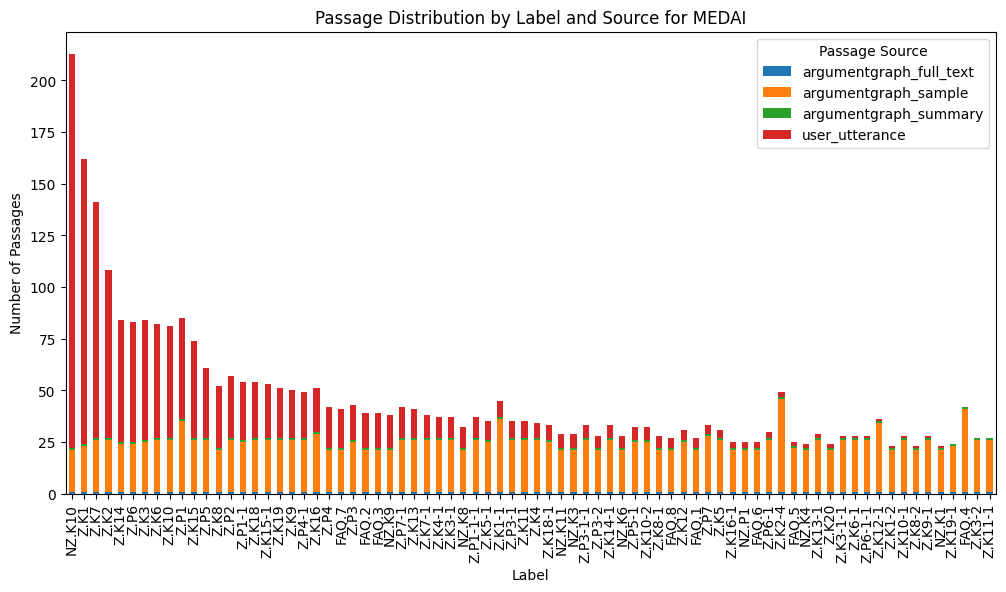

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
NZ.K10,1,20,1,191
Z.K1,1,22,1,138
Z.K7,1,25,1,114
Z.K2,1,25,1,81
Z.K14,1,23,1,59
...,...,...,...,...
NZ.K1,1,20,1,1
Z.K19-1,1,22,1,0
FAQ.4,1,40,1,0


{<DiscussionSzenario.MEDAI: 'MEDAI'>: [('Z.K19-1', 'user_utterance'),
  ('FAQ.4', 'user_utterance'),
  ('Z.K3-2', 'user_utterance'),
  ('Z.K11-1', 'user_utterance')]}

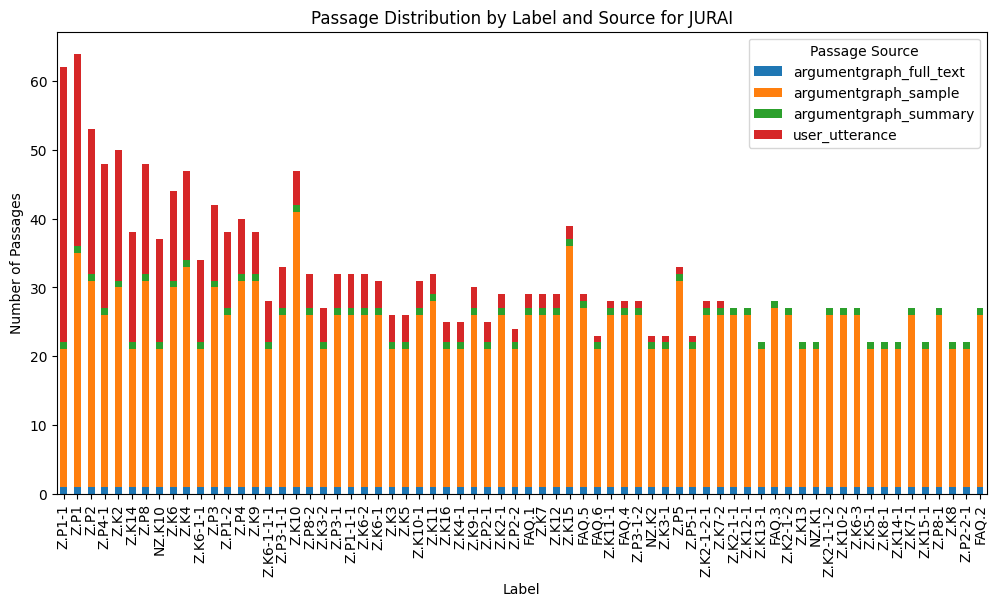

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
Z.P1-1,1,20,1,40
Z.P1,1,34,1,28
Z.P2,1,30,1,21
Z.P4-1,1,25,1,21
Z.K2,1,29,1,19
...,...,...,...,...
Z.K15-1,1,20,1,0
Z.P8-1,1,25,1,0
Z.K8,1,20,1,0


{<DiscussionSzenario.MEDAI: 'MEDAI'>: [('Z.K19-1', 'user_utterance'),
  ('FAQ.4', 'user_utterance'),
  ('Z.K3-2', 'user_utterance'),
  ('Z.K11-1', 'user_utterance')],
 <DiscussionSzenario.JURAI: 'JURAI'>: [('Z.K2-1-1', 'user_utterance'),
  ('Z.K12-1', 'user_utterance'),
  ('Z.K13-1', 'user_utterance'),
  ('FAQ.3', 'user_utterance'),
  ('Z.K2-1-2', 'user_utterance'),
  ('Z.K13', 'user_utterance'),
  ('NZ.K1', 'user_utterance'),
  ('Z.K2-1-1-2', 'user_utterance'),
  ('Z.K10-2', 'user_utterance'),
  ('Z.K6-3', 'user_utterance'),
  ('Z.K5-1', 'user_utterance'),
  ('Z.K8-1', 'user_utterance'),
  ('Z.K14-1', 'user_utterance'),
  ('Z.K7-1', 'user_utterance'),
  ('Z.K15-1', 'user_utterance'),
  ('Z.P8-1', 'user_utterance'),
  ('Z.K8', 'user_utterance'),
  ('Z.P2-2-1', 'user_utterance'),
  ('FAQ.2', 'user_utterance')]}

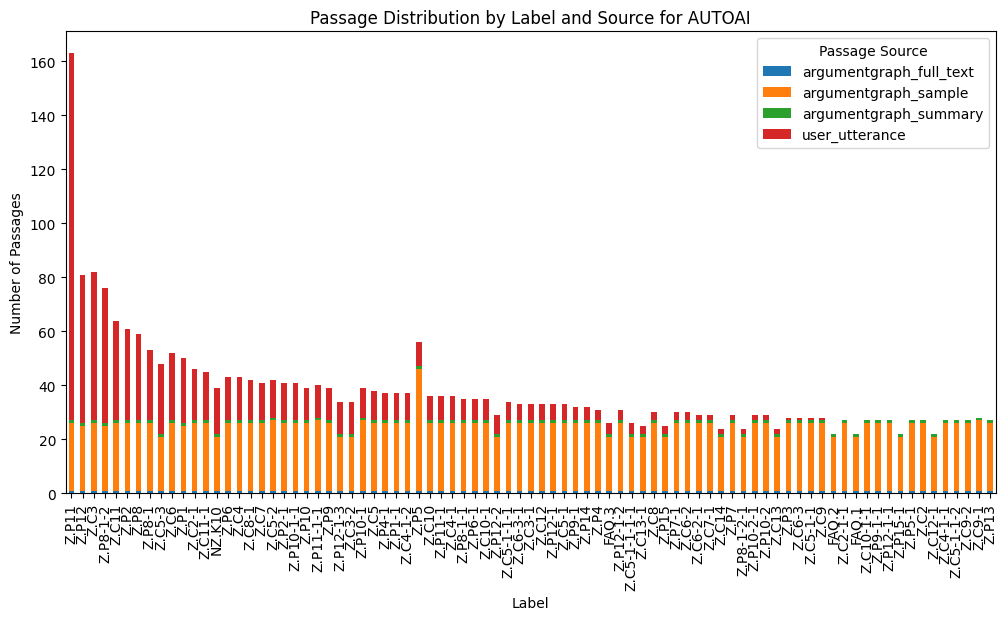

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
Z.P11,1,25,1,136
Z.P12,1,24,1,55
Z.C3,1,25,1,55
Z.P8-1-2,1,24,1,50
Z.C11,1,25,1,37
...,...,...,...,...
Z.C4-1-1,1,25,1,0
Z.C5-1-1-2,1,25,1,0
Z.C9-2,1,25,1,0


{<DiscussionSzenario.MEDAI: 'MEDAI'>: [('Z.K19-1', 'user_utterance'),
  ('FAQ.4', 'user_utterance'),
  ('Z.K3-2', 'user_utterance'),
  ('Z.K11-1', 'user_utterance')],
 <DiscussionSzenario.JURAI: 'JURAI'>: [('Z.K2-1-1', 'user_utterance'),
  ('Z.K12-1', 'user_utterance'),
  ('Z.K13-1', 'user_utterance'),
  ('FAQ.3', 'user_utterance'),
  ('Z.K2-1-2', 'user_utterance'),
  ('Z.K13', 'user_utterance'),
  ('NZ.K1', 'user_utterance'),
  ('Z.K2-1-1-2', 'user_utterance'),
  ('Z.K10-2', 'user_utterance'),
  ('Z.K6-3', 'user_utterance'),
  ('Z.K5-1', 'user_utterance'),
  ('Z.K8-1', 'user_utterance'),
  ('Z.K14-1', 'user_utterance'),
  ('Z.K7-1', 'user_utterance'),
  ('Z.K15-1', 'user_utterance'),
  ('Z.P8-1', 'user_utterance'),
  ('Z.K8', 'user_utterance'),
  ('Z.P2-2-1', 'user_utterance'),
  ('FAQ.2', 'user_utterance')],
 <DiscussionSzenario.AUTOAI: 'AUTOAI'>: [('FAQ.2', 'user_utterance'),
  ('Z.C2-1-1', 'user_utterance'),
  ('FAQ.1', 'user_utterance'),
  ('Z.C10-1-1', 'user_utterance'),
  ('Z.P9

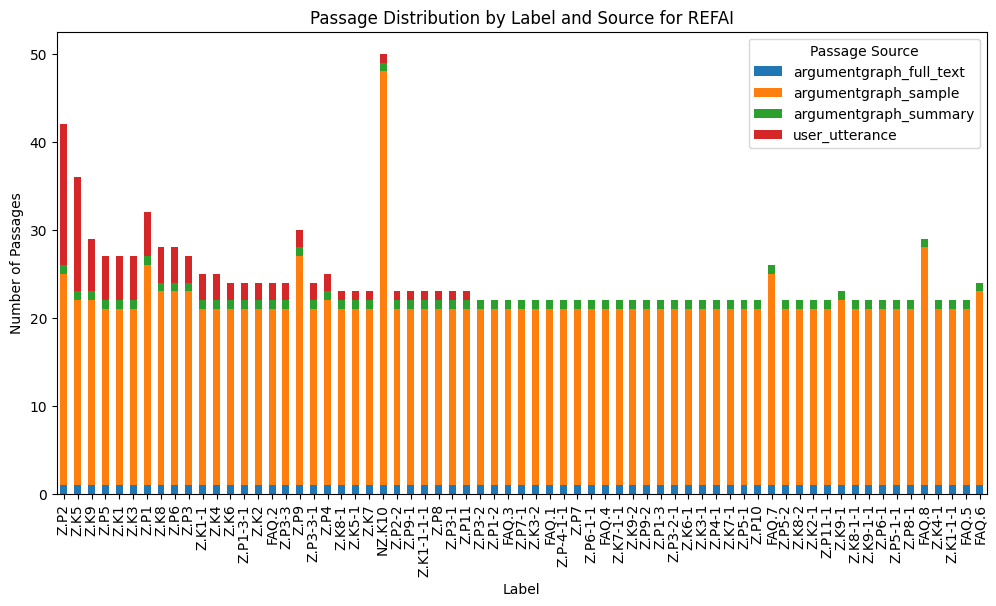

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
Z.P2,1,24,1,16
Z.K5,1,21,1,13
Z.K9,1,21,1,6
Z.P5,1,20,1,5
Z.K1,1,20,1,5
...,...,...,...,...
FAQ.8,1,27,1,0
Z.K4-1,1,20,1,0
Z.K1-1-1,1,20,1,0


{<DiscussionSzenario.MEDAI: 'MEDAI'>: [('Z.K19-1', 'user_utterance'),
  ('FAQ.4', 'user_utterance'),
  ('Z.K3-2', 'user_utterance'),
  ('Z.K11-1', 'user_utterance')],
 <DiscussionSzenario.JURAI: 'JURAI'>: [('Z.K2-1-1', 'user_utterance'),
  ('Z.K12-1', 'user_utterance'),
  ('Z.K13-1', 'user_utterance'),
  ('FAQ.3', 'user_utterance'),
  ('Z.K2-1-2', 'user_utterance'),
  ('Z.K13', 'user_utterance'),
  ('NZ.K1', 'user_utterance'),
  ('Z.K2-1-1-2', 'user_utterance'),
  ('Z.K10-2', 'user_utterance'),
  ('Z.K6-3', 'user_utterance'),
  ('Z.K5-1', 'user_utterance'),
  ('Z.K8-1', 'user_utterance'),
  ('Z.K14-1', 'user_utterance'),
  ('Z.K7-1', 'user_utterance'),
  ('Z.K15-1', 'user_utterance'),
  ('Z.P8-1', 'user_utterance'),
  ('Z.K8', 'user_utterance'),
  ('Z.P2-2-1', 'user_utterance'),
  ('FAQ.2', 'user_utterance')],
 <DiscussionSzenario.AUTOAI: 'AUTOAI'>: [('FAQ.2', 'user_utterance'),
  ('Z.C2-1-1', 'user_utterance'),
  ('FAQ.1', 'user_utterance'),
  ('Z.C10-1-1', 'user_utterance'),
  ('Z.P9

In [18]:
import matplotlib.pyplot as plt


def get_zero_count_labels(results):
    """
    For each discussion scenario, find all labels that have zero count for any passage source.

    Args:
    results (dict): Dictionary with discussion scenarios as keys and DataFrames as values.

    Returns:
    dict: Dictionary where keys are discussion scenarios and values are lists of tuples,
          each containing a label and the passage source with zero count.
    """
    zero_counts = {}
    excluded_labels = ["NZ.K1-1", "NZ.K2-1", "NZ.K3-1", "NZ.K4-1", "NZ.K5-1", "NZ.K6-1", "NZ.K7-1", "NZ.K8-1",
                       "NZ.K9-1", "NZ.K10-1",
                       "NZ.P1-1", "NZ.P2-1", "NZ.P3-1", "NZ.P4-1", "NZ.P5-1", "NZ.P6-1", "NZ.P7-1", "NZ.P8-1",
                       "NZ.P9-1", "NZ.P10-1",
                       ]
    for scenario, table in results.items():
        zero_labels = []
        for label, row in table.iterrows():
            if label in excluded_labels:
                continue
            for column in table.columns:
                if row[column] == 0:
                    zero_labels.append((label, column))

        zero_counts[scenario] = zero_labels

    return zero_counts


# Create a results dictionary
results = {}

for scenario, labels in labels_per_scenario.items():
    # Filter passages for the current discussion scenario
    scenario_passages = passages_df[passages_df["discussion_scenario"] == scenario]

    # Count passages per label and passage source
    passage_counts = (
        scenario_passages.groupby(["label", "passage_source"]).size().unstack(fill_value=0)
    )

    # Ensure all labels from the graph are present in the table (fill missing labels with 0)
    passage_counts = passage_counts.reindex(labels, fill_value=0).sort_values("user_utterance", ascending=False)

    # Store the table for visualization
    results[scenario] = passage_counts

    # Plot the stacked bar chart
    passage_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
    plt.xlabel("Label")
    plt.ylabel("Number of Passages")
    plt.title(f"Passage Distribution by Label and Source for {scenario}")
    plt.xticks(rotation=90)
    plt.legend(title="Passage Source")
    plt.show()
    display(passage_counts)
    print("\n\n")
    display(get_zero_count_labels(results))



# Display tables for each DiscussionScenario
# for scenario, table in results.items():
#     display(table, scenario)

In [19]:
results["MEDAI"]

passage_source,argumentgraph_full_text,argumentgraph_sample,argumentgraph_summary,user_utterance
label,,,,
NZ.K10,1,20,1,191
Z.K1,1,22,1,138
Z.K7,1,25,1,114
Z.K2,1,25,1,81
Z.K14,1,23,1,59
...,...,...,...,...
NZ.K1,1,20,1,1
Z.K19-1,1,22,1,0
FAQ.4,1,40,1,0


In [20]:
from src.data.dataset_splits import create_splits_from_corpus_dataset
from src.data.create_corpus_dataset import DatasetSplitType

# show anchor label distribution for the splits by discussion scenario
in_distribution_split = create_splits_from_corpus_dataset(corpus_dataset=loaded_dataset,
                                                          dataset_split_type=DatasetSplitType.InDistribution,
                                                          save_folder=dataset_folder,
                                                          dataset_save_name="dataset_split_in_distribution_labels_per_scenario", )
in_distribution_split


Dataset already exists at ../../data/processed/with_context/dataset_split_in_distribution_labels_per_scenario. Loading it.


/home/christian/PycharmProjects/ethikchat-experiment-argument-classification/src/data/dataset_splits.py:111: UserWarning: Overlapping texts between train and test (but no overlapping query ids, so theses are not the same queries): 1
Example texts: ['Sicherheit']
  warnings.warn(


DatasetDict({
    train: DatasetDict({
        queries: Dataset({
            features: ['id', 'text', 'labels', 'discussion_scenario', 'context', 'scenario_description', 'scenario_question'],
            num_rows: 1940
        })
        passages: Dataset({
            features: ['id', 'text', 'label', 'discussion_scenario', 'passage_source', 'retrieved_query_id'],
            num_rows: 10386
        })
        queries_relevant_passages_mapping: Dataset({
            features: ['query_id', 'passages_ids'],
            num_rows: 1940
        })
        queries_trivial_passages_mapping: Dataset({
            features: ['query_id', 'passages_ids'],
            num_rows: 1940
        })
    })
    validation: DatasetDict({
        queries: Dataset({
            features: ['id', 'text', 'labels', 'discussion_scenario', 'context', 'scenario_description', 'scenario_question'],
            num_rows: 415
        })
        passages: Dataset({
            features: ['id', 'text', 'label', 'disc

In [21]:
from collections import defaultdict
import pandas as pd

# Count labels per scenario and split
label_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for split in ["train", "validation", "test"]:
    for query in in_distribution_split[split]["queries"]:
        scenario = query["discussion_scenario"]
        for label in query["labels"]:
            label_counts[scenario][label][split] += 1

# Build dataframe
records = []
for scenario, label_dict in label_counts.items():
    for label, splits in label_dict.items():
        for split, count in splits.items():
            records.append({
                "scenario": scenario,
                "label": label,
                "split": split,
                "count": count
            })

df = pd.DataFrame(records)

# # Plot stacked bar chart per scenario
# scenarios = df["scenario"].unique()
# for scenario in scenarios:
#     df_scenario = df[df["scenario"] == scenario]
#     pivot_df = df_scenario.pivot(index="label", columns="split", values="count").fillna(0)
#     pivot_df.plot(kind="bar", stacked=True, color=["blue", "yellow", "red"], figsize=(12, 6))
#     plt.title(f"Label Distribution in {scenario}")
#     plt.ylabel("Count")
#     plt.xlabel("Label")
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.show()

In [22]:
# Define a function to print missing labels per scenario and split

def print_missing_labels_per_split(df):
    scenarios = df["scenario"].unique()
    splits = ["train", "validation", "test"]

    for scenario in scenarios:
        df_scenario = df[df["scenario"] == scenario]
        labels_all = set(df_scenario["label"].unique())
        train_labels = set(df_scenario[df_scenario["split"] == "train"]["label"].unique())
        eval_labels = set(df_scenario[df_scenario["split"] == "validation"]["label"].unique())
        test_labels = set(df_scenario[df_scenario["split"] == "test"]["label"].unique())

        test_is_subset_of_train = test_labels.issubset(train_labels)
        eval_is_subset_of_train = eval_labels.issubset(train_labels)

        print(f"\nScenario: {scenario}")
        print(f"Testset contains only labels from train set: {test_is_subset_of_train}")
        if not test_is_subset_of_train:
            print(f"Labels that are present in test set but not in train set: {sorted(test_labels - train_labels)}")

        print(f"Evaluation set contains only labels from train set: {eval_is_subset_of_train}")
        if not eval_is_subset_of_train:
            print(
                f"Labels that are present in evaluation set but not in train set: {sorted(eval_labels - train_labels)}")

        # print(f"\nScenario: {scenario}")
        # for split in splits:
        #     labels_in_split = set(df_scenario[df_scenario["split"] == split]["label"].unique())
        #     missing_labels = labels_all - labels_in_split
        #     if missing_labels:
        #         print(f"  Labels missing in {split}: {sorted(missing_labels)}")
        #     else:
        #         print(f"  All labels present in {split}")


# Run the function on our current dataframe
print_missing_labels_per_split(df)



Scenario: MEDAI
Testset contains only labels from train set: True
Evaluation set contains only labels from train set: True

Scenario: JURAI
Testset contains only labels from train set: True
Evaluation set contains only labels from train set: True

Scenario: AUTOAI
Testset contains only labels from train set: True
Evaluation set contains only labels from train set: True

Scenario: REFAI
Testset contains only labels from train set: True
Evaluation set contains only labels from train set: True
